So the motivation for this was, to be entirely honest, kind of selfish. I'm buying a house and I want to see how much my house *could* increase by in 'N' years. Basically, a kind of experiment. It is also handy for me to practice time-series analysis, bit of data science stuff, and some ML practice.

The project is broken down into a few parts:
1. the web-scraping, to gather data from the [RightMove.co.uk](https://www.rightmove.co.uk) website. For historical data, and then use this to try and predict how the houses will increase.
2. the analysis of the data, see if there any trends I can see from this analysis as is.
3. the forecasting, can I do some basic forecasting with the data alone, or can I set up an ML model to predict it for me.

# 1. Importing and Pre-Processing
## 1.1 Imports and Load Data

In [1]:
random_code = 42  # Random code to use and replicate results for each run.

# Data Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Geography imports
import plotly.express as px


# Personal Import
from Dataset_Snapshot import RightMoveScraper

Run the next function as needed if you need a new CSV to work with. This will generate a CSV for every run of this code, this is not ideal. Plus also as a basic tool, a separate python file will suffice.

In [2]:
"""# Create an instance of the scraper
scraper = RightMoveScraper(num_pages=10)  # Adjust the number of pages as needed
scraper.run()"""

'# Create an instance of the scraper\nscraper = RightMoveScraper(num_pages=10)  # Adjust the number of pages as needed\nscraper.run()'

In [3]:
data_file = 'rightmove_housing_data_20250330_233719.csv'
df = pd.read_csv(data_file)

## 1.2 Data Clean Up
Tidy up the data now as it's not really in a state to use just yet.

In [4]:
print(df.dtypes)  # Look at the types of each column

address           object
propertyType      object
bedrooms         float64
bathrooms        float64
latitude         float64
longitude        float64
display_price     object
date_sold         object
dtype: object


In [5]:
# Display Price Changes - change from 'str' to 'float'
df['display_price'] = df['display_price'].replace('[^0-9.]', '', regex=True).astype(float) 
# Date Sold changes - change from DD-MM-YYYY 'str' to YYYYMMDD 'int'
df['date_sold'] = pd.to_datetime(df['date_sold'], errors='coerce')
df['date_sold'] = df['date_sold'].dt.strftime('%Y%m%d').astype(int)
print(df.dtypes)  # Look 

address           object
propertyType      object
bedrooms         float64
bathrooms        float64
latitude         float64
longitude        float64
display_price    float64
date_sold          int32
dtype: object


In [6]:
df.head()

,address,propertyType,bedrooms,bathrooms,latitude,longitude,display_price,date_sold
0,"9, Stallcourt Avenue, Cardiff CF23 5AL",TERRACED,3.0,2.0,51.49517,-3.15421,437000.0,20250110
1,"9, Stallcourt Avenue, Cardiff CF23 5AL",TERRACED,3.0,2.0,51.49517,-3.15421,330000.0,20190418
2,"87, Clifton Street, Cardiff CF24 1LT",TERRACED,3.0,1.0,51.48374,-3.15580,240000.0,20250110
3,"87, Clifton Street, Cardiff CF24 1LT",TERRACED,3.0,1.0,51.48374,-3.15580,207000.0,20221028
4,"87, Clifton Street, Cardiff CF24 1LT",TERRACED,3.0,1.0,51.48374,-3.15580,151000.0,20150723


## 1.3 Basic Analysis

In [7]:
color_scale = [(0, 'yellow'), (1,'red')]
# Display the data on the map
fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="address", 
                        hover_data=["address", "display_price", 'date_sold'],
                        color="display_price",
                        color_continuous_scale=color_scale,
                        size="display_price",
                        zoom=13, 
                        height=600,
                        width=1200)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

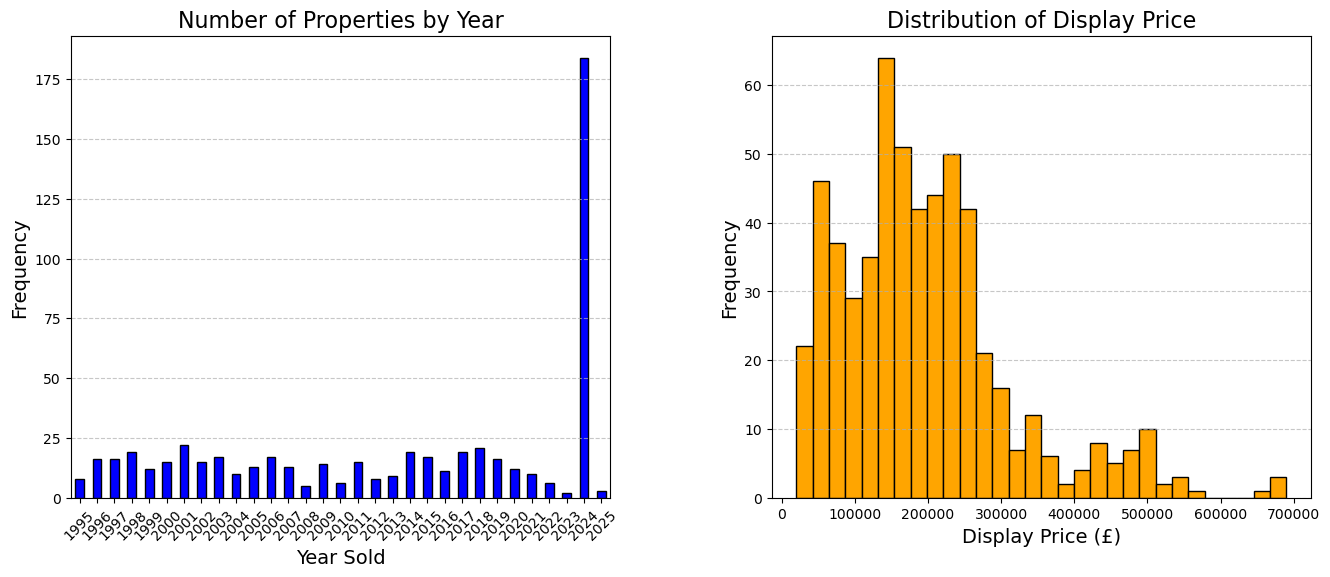

In [8]:
# Extract the year from the 'date_sold' column
df['year_sold'] = pd.to_datetime(df['date_sold'], format='%Y%m%d', errors='coerce').dt.year

fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'wspace': 0.3})

# First subplot: Number of properties by year
df['year_sold'].value_counts().sort_index().plot(kind='bar', edgecolor='black', ax=axes[0], color='blue')
axes[0].set_title('Number of Properties by Year', fontsize=16)
axes[0].set_xlabel('Year Sold', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Second subplot: Histogram of display_price
axes[1].hist(df['display_price'], bins=30, color='orange', edgecolor='black')
axes[1].set_title('Distribution of Display Price', fontsize=16)
axes[1].set_xlabel('Display Price (£)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

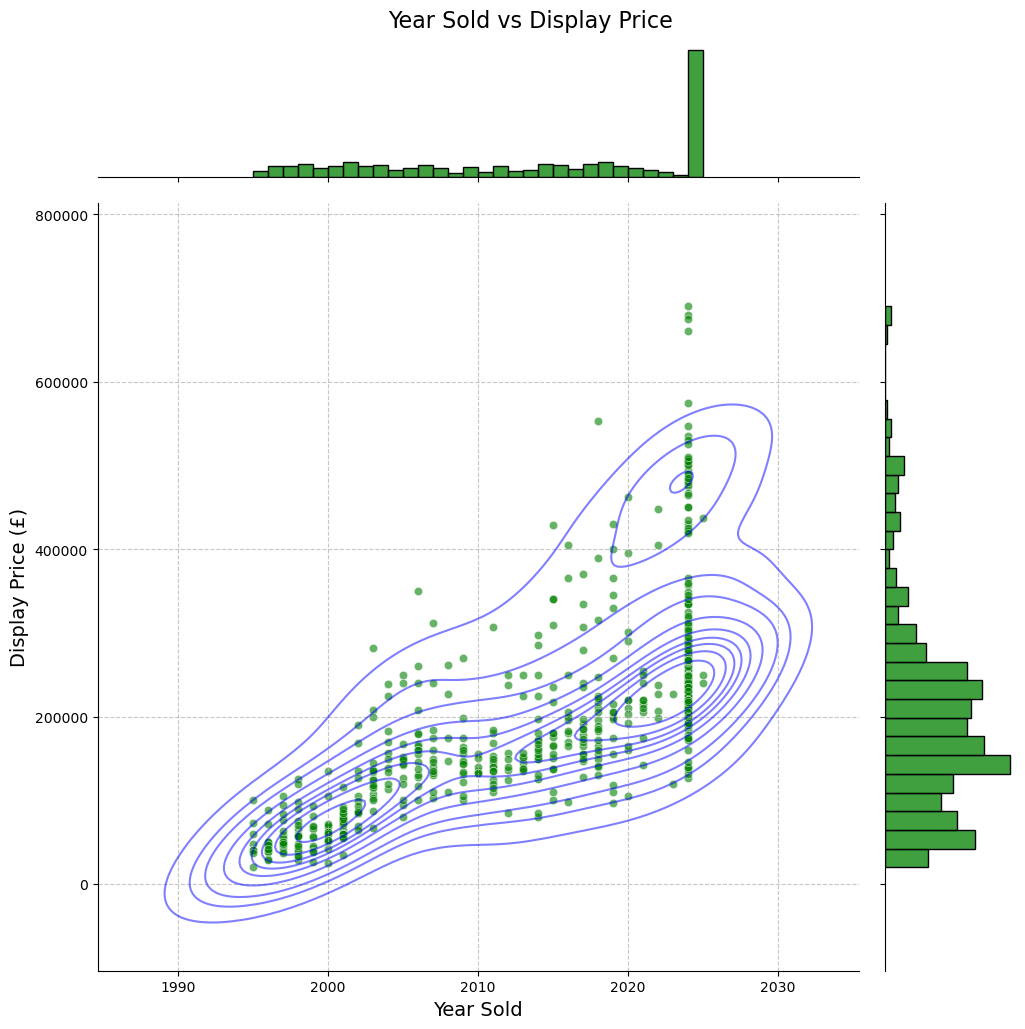

In [9]:
sns.jointplot(data=df,x='year_sold',y='display_price',kind='scatter',alpha=0.6,color='green',marginal_kws=dict(bins=30, fill=True),height=10, ratio=5) # Generate Scatter and hist
sns.kdeplot(data=df,x='year_sold',y='display_price',levels=10,color='blue',alpha=0.5,)  # KDE plot to generate contour map 

plt.suptitle('Year Sold vs Display Price', y=1.02, fontsize=16)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Display Price (£)', fontsize=14)

# Show the plot
plt.grid(linestyle='--', alpha=0.7)
plt.show()